In [3]:
out_image_size =2048
row = 9
col = 5
num_images = 45
base_path = '../output/yolov3 prediction using the weights after 5 epochs/'

In [4]:
from glob import glob
image_folder = base_path

types = ('png', 'jpg') # the tuple of file types
img_paths = []
for t in types:
    img_paths.extend(glob(image_folder + '*.{}'.format(t)))
len(img_paths)

45

In [5]:
def removeAxeEdge(ax):
    for loc, spine in ax.spines.items():
        spine.set_color('none')
        
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])

out_image_height =  2511


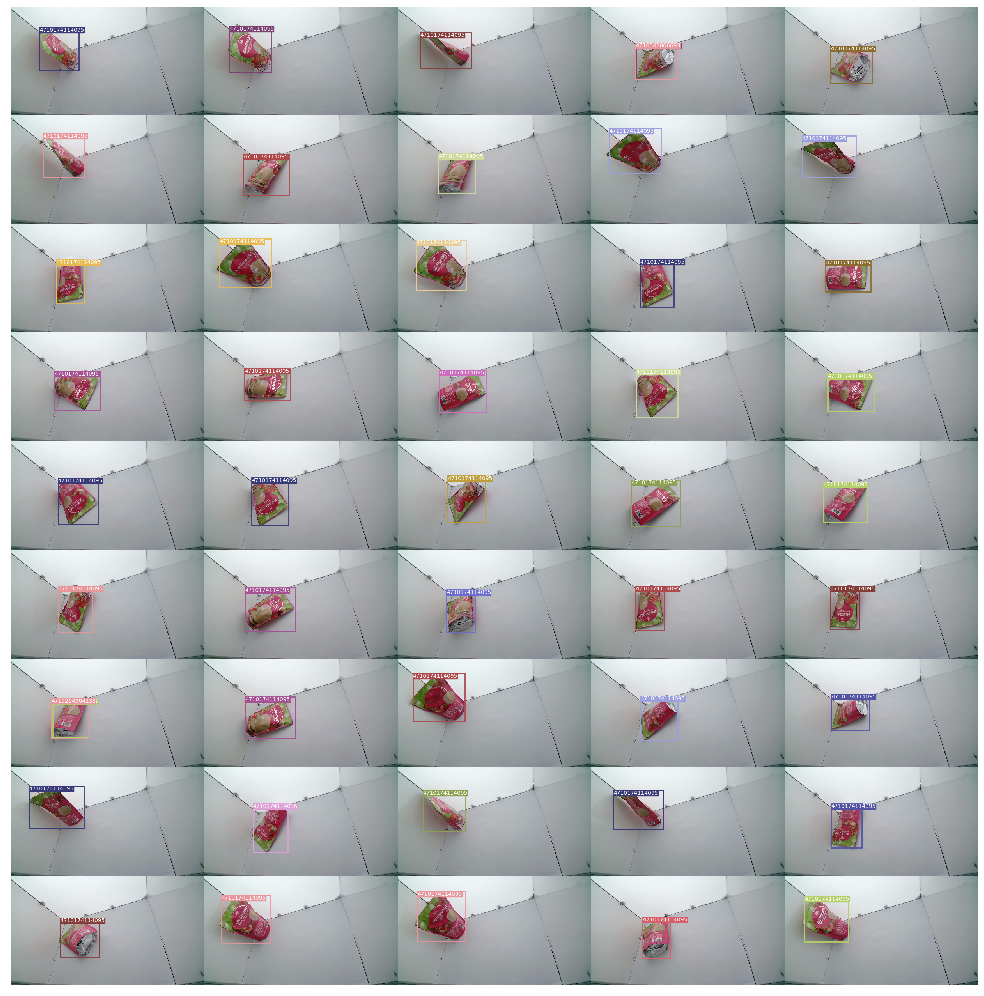

True

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread(img_paths[0],cv2.IMREAD_UNCHANGED)

width = image.shape[1]
height = image.shape[0] 
out_image_width = width * col
out_image_height = height * row
print("out_image_height = ",out_image_height)
out_image = np.zeros(shape=[out_image_height, out_image_width, 3], dtype=np.uint8)
fig=plt.figure(figsize=(18,18))
ax = fig.add_subplot()
removeAxeEdge(ax)

row_idx = 0
col_idx = 0
x_offset = 0
y_offset = 0

for idx, img_path in enumerate(img_paths):    
    
    image = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    width = image.shape[1]
    height = image.shape[0]

    out_image[y_offset:y_offset+height, x_offset:x_offset+width] = image
    
    if col_idx != col-1:
        col_idx += 1
        x_offset += width
    else:
        col_idx = 0
        x_offset = 0
        if row_idx != row-1:
            row_idx += 1
            y_offset += height
            
plt.imshow(out_image)
plt.show()
import os
cv2.imwrite(os.path.join(base_path,'collage.jpg'), out_image)


    